# Cap Stone

In [1]:
########
# Pips #
########

!pip install deap update_checker tqdm
!pip install tpot


In [168]:
###########
# Imports #
###########

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from scipy.stats import boxcox
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV
#from tpot import TPOTRegressor
import pandas as pd
import numpy as np
import folium 
import seaborn as sns
import matplotlib.pyplot as plt
import patsy
 
plt.style.use('ggplot')

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_regression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor

### <span style="color:red"> Data </span>

1.  Core dataset:

    http://tomslee.net/airbnb-data-collection-get-the-data
    

2.  GEOjson for mapping the above data to folium:
    
    http://insideairbnb.com/get-the-data.html
    

In [212]:
####################
# CSV to dataframe #
####################

airbnb_df = pd.read_csv('data/la/los_angeles/tomslee_airbnb_los_angeles_1422_2017-07-08.csv')

### <span style="color:red"> Cleaning process </span>


In [4]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32146 entries, 0 to 32145
Data columns (total 19 columns):
room_id                 32146 non-null int64
survey_id               32146 non-null int64
host_id                 32146 non-null int64
room_type               32146 non-null object
country                 0 non-null float64
city                    32146 non-null object
borough                 0 non-null float64
neighborhood            32146 non-null object
reviews                 32146 non-null int64
overall_satisfaction    32146 non-null float64
accommodates            32146 non-null int64
bedrooms                32146 non-null float64
bathrooms               0 non-null float64
price                   32146 non-null float64
minstay                 0 non-null float64
last_modified           32146 non-null object
latitude                32146 non-null float64
longitude               32146 non-null float64
location                32146 non-null object
dtypes: float64(9), int64(5),

#### Dropped Features

```
 - room_id
 - survey_id
 - host_id
 - country
 - city
 - borough
 - bathroom
 - minstay
 - last_modified
 - latitude
 - longitude
 - location
```

In [5]:
airbnb_df = airbnb_df.drop(['room_id',
                            'survey_id', 
                            'host_id', 
                            'country', 
                            'city', 
                            'borough',
                            'bathrooms',
                            'minstay',
                            'last_modified',
                            'latitude',
                            'longitude',
                            'location'
                           ], axis=1)

In [6]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32146 entries, 0 to 32145
Data columns (total 7 columns):
room_type               32146 non-null object
neighborhood            32146 non-null object
reviews                 32146 non-null int64
overall_satisfaction    32146 non-null float64
accommodates            32146 non-null int64
bedrooms                32146 non-null float64
price                   32146 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.7+ MB


In [7]:
airbnb_df.head(10)

,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
0,Shared room,Downtown,1,0.0,4,1.0,150.0
1,Shared room,Long Beach,0,0.0,1,1.0,130.0
2,Shared room,Long Beach,0,0.0,2,1.0,130.0
3,Shared room,Glendale,0,0.0,1,1.0,125.0
4,Shared room,Koreatown,0,0.0,1,1.0,120.0
5,Shared room,Hollywood,0,0.0,1,1.0,121.0
6,Shared room,Brentwood,0,0.0,2,1.0,135.0
7,Shared room,Santa Monica,31,4.5,2,1.0,125.0
8,Shared room,Woodland Hills,0,0.0,10,1.0,120.0
9,Shared room,Los Feliz,0,0.0,1,1.0,120.0


In [333]:
airbnb_df['bedrooms'].value_counts()

1.0     19742
2.0      5324
0.0      3322
3.0      2373
4.0       890
5.0       315
6.0       102
7.0        43
8.0        14
9.0        12
10.0        9
Name: bedrooms, dtype: int64

### <span style="color:red"> EDA </span>

2. Folium
3. Plots

In [ ]:
# Initially I tried dropping pins for every location however there were too many to process, so I took a second
# approach of dispaying a heat map of the LA neighbourhoods.

In [ ]:
##########
# Folium #
##########

import folium
import pandas as pd

hood_geo = r'la_neighbourhoods.geojson'
la_listings = r'la_listings_may_17.csv'

la_data = pd.read_csv(la_listings)

In [ ]:
#instantiate folium

map_1 = folium.Map(location=[34.052235, -118.243683], zoom_start=10)

In [ ]:
map_1.choropleth('la_neighbourhoods.geojson', data=la_data, 
               columns=['neighbourhood', 'price'], 
               threshold_scale=[50, 100, 150, 200, 250, 300],
               key_on='feature.properties.neighbourhood', 
               fill_color='YlGn', fill_opacity=0.6, 
               line_opacity=1, legend_name='price')
folium.Marker([34.1478, -118.1445], popup='Pasadena').add_to(map_1)
folium.Marker([34.052235, -118.243683], popup='Los Angeles').add_to(map_1)
folium.Marker([34.0736, -118.4004], popup='Beverly Hills').add_to(map_1)
folium.Marker([34.1063, -118.2848], popup='Los Feliz').add_to(map_1)
folium.Marker([34.0900, -118.3617], popup='West Hollywood').add_to(map_1)
folium.Marker([34.0298, -118.2117], popup='Boyle Heights').add_to(map_1)
folium.Marker([34.1002, -118.4595], popup='Bel Air').add_to(map_1)
folium.Marker([34.0416, -118.3287], popup='Mid-City').add_to(map_1)

map_1.save('map3.html')


In [8]:
airbnb_df['room_type'].value_counts()

Entire home/apt    19551
Private room       11091
Shared room         1504
Name: room_type, dtype: int64

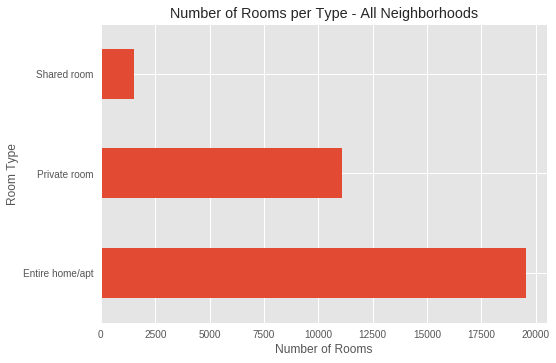

In [248]:
ax = airbnb_df['room_type'].value_counts().plot(kind='barh')
ax.set_title('Number of Rooms per Type - All Neighborhoods')
ax.set_xlabel('Number of Rooms')
ax.set_ylabel('Room Type')
plt.show()

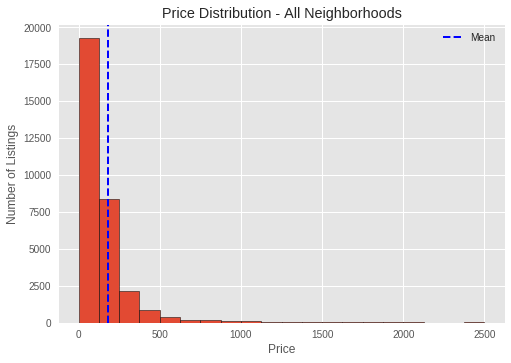

In [302]:
plt.hist(airbnb_df['price'], bins=20, range=(0,2500), edgecolor='black')
plt.axvline(airbnb_df['price'].mean(), color='b', linestyle='dashed', linewidth=2)
plt.title('Price Distribution - All Neighborhoods')
plt.xlabel('Price')
plt.ylabel('Number of Listings')
plt.legend(['Mean'])
plt.show()

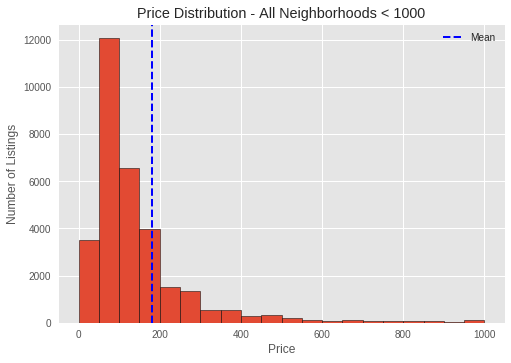

In [303]:
plt.hist(airbnb_df['price'], bins=20, range=(0,1000), edgecolor='black', label='mean')
plt.axvline(airbnb_df['price'].mean(), color='b', linestyle='dashed', linewidth=2)
plt.title('Price Distribution - All Neighborhoods < 1000')
plt.xlabel('Price')
plt.ylabel('Number of Listings')
plt.legend(['Mean'])
plt.show()

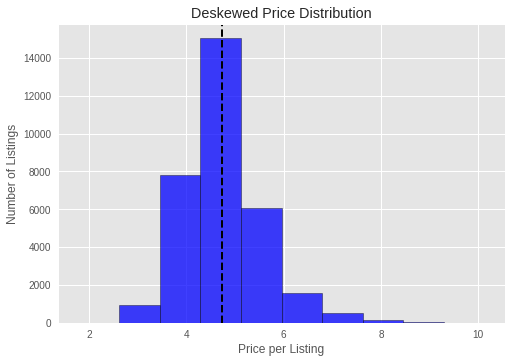

In [148]:
#############
# Deskewing #
#############

deskewed_price = np.log1p(airbnb_df['price'])

plt.hist(deskewed_price,facecolor='blue',alpha=0.75, edgecolor='black') 
plt.axvline(deskewed_price.mean(), color='black', linestyle='dashed', linewidth=2)
plt.title('Deskewed Price Distribution')
plt.xlabel('Price per Listing')
plt.ylabel('Number of Listings')
plt.show()


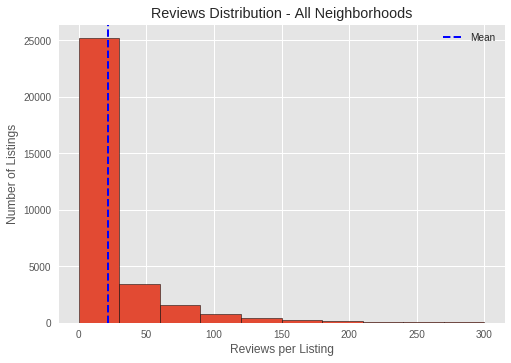

In [304]:
plt.hist(airbnb_df['reviews'], bins=10, range=(0,300), edgecolor='black')
plt.axvline(airbnb_df['reviews'].mean(), color='b', linestyle='dashed', linewidth=2)
plt.title('Reviews Distribution - All Neighborhoods')
plt.xlabel('Reviews per Listing')
plt.ylabel('Number of Listings')
plt.legend(['Mean'])
plt.show()

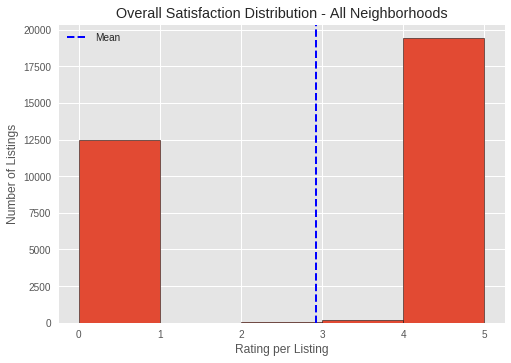

In [325]:
plt.hist(airbnb_df['overall_satisfaction'], bins=5, range=(0,5), edgecolor='black')
plt.axvline(airbnb_df['overall_satisfaction'].mean(), color='b', linestyle='dashed', linewidth=2)
plt.title('Overall Satisfaction Distribution - All Neighborhoods')
plt.xlabel('Rating per Listing')
plt.ylabel('Number of Listings')
plt.legend(['Mean'])
plt.show()

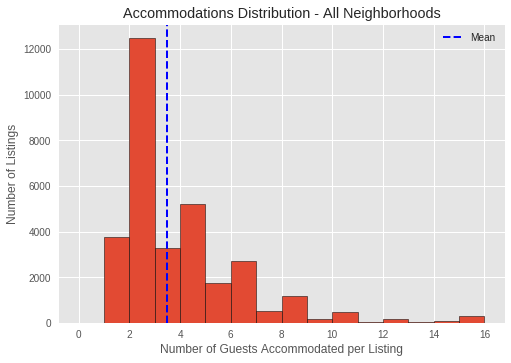

In [326]:
plt.hist(airbnb_df['accommodates'], bins=16, range=(0,16), edgecolor='black')
plt.axvline(airbnb_df['accommodates'].mean(), color='b', linestyle='dashed', linewidth=2)
plt.title('Accommodations Distribution - All Neighborhoods')
plt.xlabel('Number of Guests Accommodated per Listing')
plt.ylabel('Number of Listings')
plt.legend(['Mean'])
plt.show()

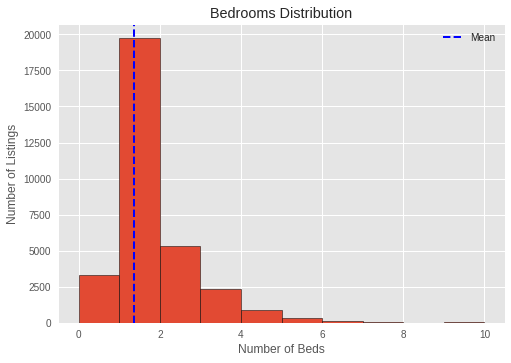

In [330]:
plt.hist(airbnb_df['bedrooms'], bins=10, range=(0,10), edgecolor='black')
plt.axvline(airbnb_df['bedrooms'].mean(), color='b', linestyle='dashed', linewidth=2)
plt.title('Bedrooms Distribution')
plt.xlabel('Number of Beds')
plt.ylabel('Number of Listings')
plt.legend(['Mean'])
plt.show()

In [342]:
q1 = airbnb_df.loc[airbnb_df['price'] <= 300]


In [343]:
q1.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,last_modified,latitude,longitude,location
0,10300392,1422,45697001,Shared room,NaN,Los Angeles,NaN,Downtown,1,0.0,4,1.0,NaN,150.0,NaN,2017-07-09 17:49:13.219561,34.043394,-118.233189,0101000020E61000005D328E91EC8E5DC0DB6B41EF8D05...
1,13116069,1422,72407943,Shared room,NaN,Los Angeles,NaN,Long Beach,0,0.0,1,1.0,NaN,130.0,NaN,2017-07-09 17:49:11.687844,33.765878,-118.184296,0101000020E610000027327381CB8B5DC0EA5C514A08E2...
2,14731531,1422,91735298,Shared room,NaN,Los Angeles,NaN,Long Beach,0,0.0,2,1.0,NaN,130.0,NaN,2017-07-09 17:49:11.684833,33.782263,-118.191232,0101000020E6100000B77C24253D8C5DC078EFA83121E4...
3,6463767,1422,33757504,Shared room,NaN,Los Angeles,NaN,Glendale,0,0.0,1,1.0,NaN,125.0,NaN,2017-07-09 17:49:11.682023,34.152230,-118.248960,0101000020E6100000C780ECF5EE8F5DC02CBCCB457C13...
4,14593443,1422,90512096,Shared room,NaN,Los Angeles,NaN,Koreatown,0,0.0,1,1.0,NaN,120.0,NaN,2017-07-09 17:49:11.679317,34.064526,-118.292650,0101000020E610000029CB10C7BA925DC0F0DE51634208...


In [400]:
q1.neighborhood.unique()

array(['Downtown', 'Long Beach', 'Glendale', 'Koreatown', 'Hollywood',
       'Brentwood', 'Santa Monica', 'Woodland Hills', 'Los Feliz',
       'Redondo Beach', 'Venice', 'Larchmont', 'Ladera Heights',
       'West Hollywood', 'Beverly Hills', 'Sherman Oaks', 'Westlake',
       'Gramercy Park', 'Beverly Crest', 'Del Rey', 'Gardena',
       'Marina del Rey', 'Playa Vista', 'Mid-Wilshire', 'Pico-Robertson',
       'Silver Lake', 'West Adams', 'Westwood', 'Sawtelle', 'Studio City',
       'Palms', 'Mid-City', 'Central-Alameda', 'Hollywood Hills',
       'East Hollywood', 'Valley Village', 'Adams-Normandie',
       'Hancock Park', 'Playa del Rey', 'Historic South-Central',
       'Beverly Grove', 'Tarzana', 'Van Nuys', 'Torrance', 'Reseda',
       'Mar Vista', 'Watts', 'North Hollywood', 'West Los Angeles',
       'Chinatown', 'Pico-Union', 'Fairfax', 'Harvard Heights',
       'Exposition Park', 'Lakewood', 'Hawthorne', 'El Segundo',
       'Huntington Park', 'Santa Clarita', 'Pico Rivera


# Cities with Top Sights in LA According to Lonely Planet #

1. Pasadena
2. East Los Angeles
3. Beverly Hills
4. Los Feliz
5. West Hollywood
6. Boyle Heights
7. Bel Air
8. Mid-City




In [345]:
top_q1 = q1.loc[(q1['neighborhood'] == 'Pasadena') | 
                (q1['neighborhood'] == 'East Los Angeles') |
                (q1['neighborhood'] == 'Beverly Hills') |
                (q1['neighborhood'] == 'Los Feliz') |
                (q1['neighborhood'] == 'West Hollywood') |
                (q1['neighborhood'] == 'Boyle Heights') |
                (q1['neighborhood'] == 'Bel Air') |
                (q1['neighborhood'] == 'Mid-City')
               ]

In [346]:
top_q1.head(10)

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,last_modified,latitude,longitude,location
9,6044839,1422,22324209,Shared room,NaN,Los Angeles,NaN,Los Feliz,0,0.0,1,1.0,NaN,120.0,NaN,2017-07-09 17:49:09.412581,34.104263,-118.300371,0101000020E6100000AD6A494739935DC068976F7D580D...
18,15705512,1422,101420454,Shared room,NaN,Los Angeles,NaN,West Hollywood,1,0.0,3,1.0,NaN,120.0,NaN,2017-07-09 17:49:08.356339,34.094211,-118.364765,0101000020E61000006E6E4C4F58975DC034F6251B0F0C...
20,14971184,1422,92857538,Shared room,NaN,Los Angeles,NaN,Beverly Hills,0,0.0,2,1.0,NaN,100.0,NaN,2017-07-09 17:49:05.188050,34.068172,-118.391355,0101000020E61000001288D7F50B995DC05F402FDCB908...
28,3256419,1422,94718,Shared room,NaN,Los Angeles,NaN,West Hollywood,0,0.0,1,1.0,NaN,95.0,NaN,2017-07-09 17:49:05.156476,34.093377,-118.370520,0101000020E6100000E4A08499B6975DC06B990CC7F30B...
39,13697008,1422,79862593,Shared room,NaN,Los Angeles,NaN,West Hollywood,1,0.0,1,1.0,NaN,99.0,NaN,2017-07-09 17:49:01.924840,34.091197,-118.365271,0101000020E610000058CB9D9960975DC0253FE257AC0B...
43,8663947,1422,21652452,Shared room,NaN,Los Angeles,NaN,West Hollywood,1,0.0,1,1.0,NaN,99.0,NaN,2017-07-09 17:49:01.908948,34.090296,-118.371288,0101000020E61000006D59BE2EC3975DC0D57ABFD18E0B...
52,5136242,1422,24615600,Shared room,NaN,Los Angeles,NaN,Mid-City,0,0.0,2,1.0,NaN,80.0,NaN,2017-07-09 17:48:59.508985,34.047552,-118.350272,0101000020E6100000172D40DB6A965DC0016E162F1606...
103,13438388,1422,6273003,Shared room,NaN,Los Angeles,NaN,West Hollywood,1,0.0,2,1.0,NaN,70.0,NaN,2017-07-09 17:48:49.177919,34.083830,-118.378723,0101000020E61000008DCF64FF3C985DC03B3602F1BA0A...
114,12783073,1422,37081515,Shared room,NaN,Los Angeles,NaN,Mid-City,10,4.0,3,1.0,NaN,70.0,NaN,2017-07-09 17:48:47.780381,34.048196,-118.331473,0101000020E610000073A087DA36955DC025E659492B06...
116,11065145,1422,3679304,Shared room,NaN,Los Angeles,NaN,West Hollywood,16,4.0,3,1.0,NaN,71.0,NaN,2017-07-09 17:48:47.774644,34.090290,-118.383637,0101000020E6100000462234828D985DC0F3936A9F8E0B...


In [347]:
top_q1['bedrooms'].value_counts()

1.0    1896
2.0     503
0.0     289
3.0     127
4.0      20
5.0       2
6.0       1
Name: bedrooms, dtype: int64

In [348]:
top_q1.neighborhood.unique()

array(['Los Feliz', 'West Hollywood', 'Beverly Hills', 'Mid-City',
       'Pasadena', 'Boyle Heights', 'East Los Angeles'], dtype=object)

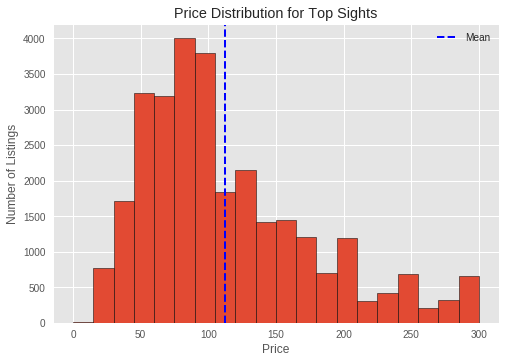

In [349]:
plt.hist(q1['price'], bins=20, range=(0,300), edgecolor='black')
plt.axvline(q1['price'].mean(), color='b', linestyle='dashed', linewidth=2)
plt.title('Price Distribution for Top Sights')
plt.xlabel('Price')
plt.ylabel('Number of Listings')
plt.legend(['Mean'])
plt.show()

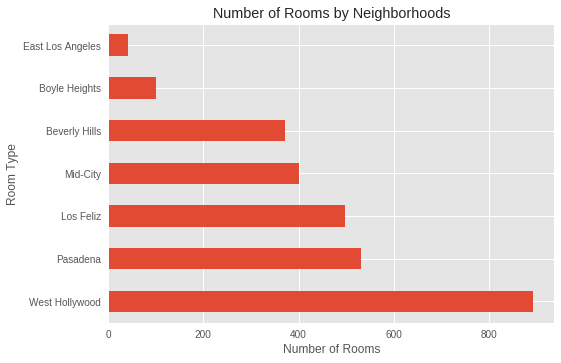

In [356]:
ax = top_q1['neighborhood'].value_counts().plot(kind='barh')
ax.set_title('Number of Rooms by Neighborhoods')
ax.set_xlabel('Number of Rooms')
ax.set_ylabel('Room Type')
plt.show()

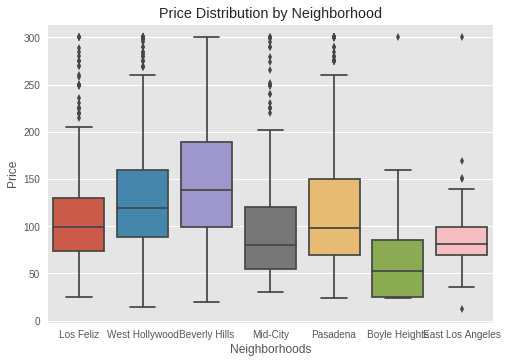

In [357]:
ax = sns.boxplot(x='neighborhood', y='price', data=top_q1)
ax.set_title('Price Distribution by Neighborhood')
ax.set_xlabel('Neighborhoods')
ax.set_ylabel('Price')
plt.show()

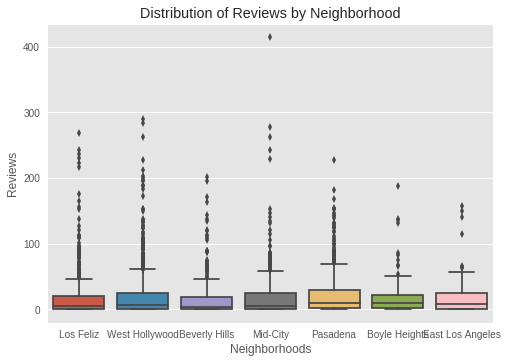

In [358]:
ax = sns.boxplot(x='neighborhood', y='reviews', data=top_q1)
ax.set_title('Distribution of Reviews by Neighborhood')
ax.set_xlabel('Neighborhoods')
ax.set_ylabel('Reviews')
plt.show()

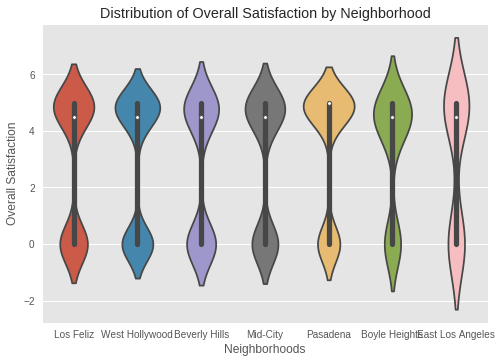

In [355]:
ax = sns.violinplot(x='neighborhood', y='overall_satisfaction', data=top_q1)
ax.set_title('Distribution of Overall Satisfaction by Neighborhood')
ax.set_xlabel('Neighborhoods')
ax.set_ylabel('Overall Satisfaction')
plt.show()

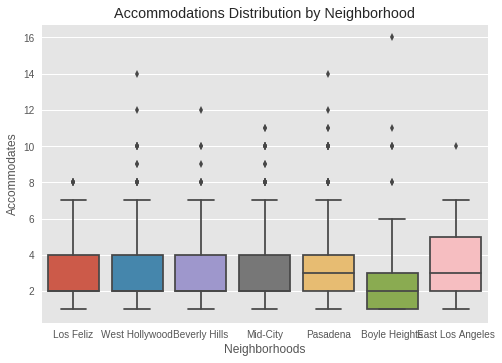

In [359]:
ax = sns.boxplot(x='neighborhood', y='accommodates', data=top_q1)
ax.set_title('Accommodations Distribution by Neighborhood')
ax.set_xlabel('Neighborhoods')
ax.set_ylabel('Accommodates')
plt.show()

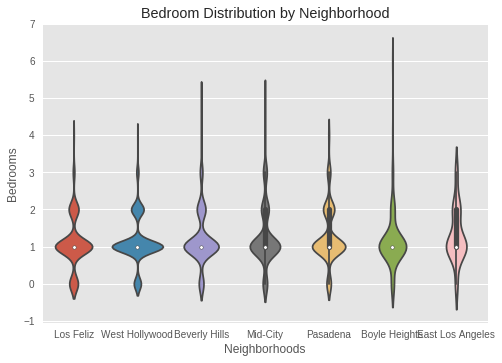

In [360]:
ax = sns.violinplot(x='neighborhood', y='bedrooms', data=top_q1)
ax.set_title('Bedroom Distribution by Neighborhood')
ax.set_xlabel('Neighborhoods')
ax.set_ylabel('Bedrooms')
plt.show()

In [24]:
deskewed_price = np.log1p(top_q1['price'])
deskewed_sat = np.log1p(top_q1['overall_satisfaction'])
deskewed_acc = np.log1p(top_q1['accommodates'])
deskewed_bed = np.log1p(top_q1['bedrooms'])
deskewed_rev = np.log1p(top_q1['reviews'])


In [25]:
top_q1 = top_q1.drop(['price', 'overall_satisfaction', 'accommodates', 'bedrooms', 'reviews'], axis=1)

In [26]:
top_q1 = pd.concat([top_q1, deskewed_price, deskewed_sat, deskewed_acc, deskewed_bed, deskewed_rev], axis=1)

In [27]:
top_q1.sample()

,room_type,neighborhood,price,overall_satisfaction,accommodates,bedrooms,reviews
27051,Private room,Pasadena,4.189655,1.791759,0.693147,0.693147,3.637586


In [130]:
top_q1_corr = top_q1.corr()
top_q1_corr

,price,overall_satisfaction,accommodates,bedrooms,reviews
price,1.000000,-0.028321,0.573962,0.364156,-0.042968
overall_satisfaction,-0.028321,1.000000,0.125188,-0.014572,0.813617
accommodates,0.573962,0.125188,1.000000,0.541606,0.136313
bedrooms,0.364156,-0.014572,0.541606,1.000000,-0.043331
reviews,-0.042968,0.813617,0.136313,-0.043331,1.000000


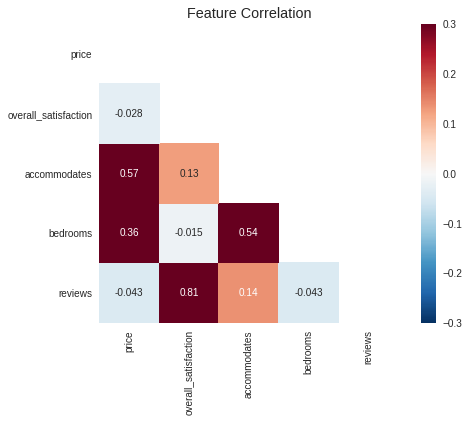

In [367]:
#ax = sns.heatmap(top_q1_corr, annot = True)
mask = np.zeros_like(top_q1_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
        ax = sns.heatmap(top_q1_corr, mask=mask, vmax=.3, square=True, annot=True)

ax.set_title('Feature Correlation')       
plt.show()

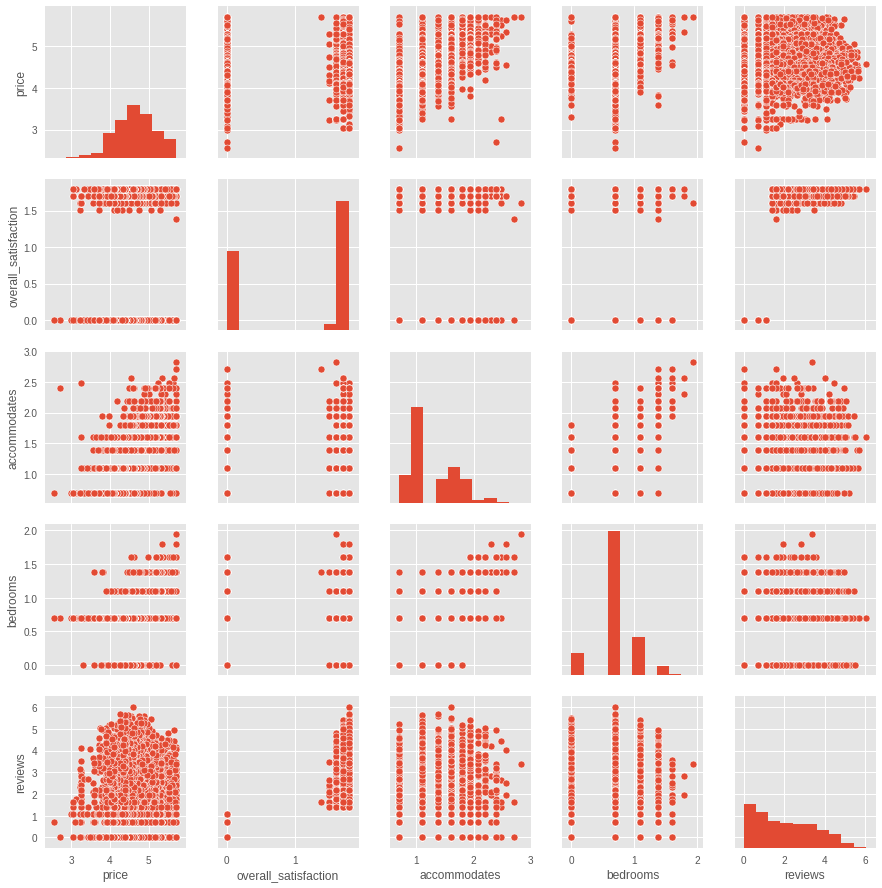

In [136]:
sns.pairplot(data=top_q1)
plt.show()

In [28]:
###########
# Dummies #
###########

room_dummies = pd.get_dummies(top_q1.room_type, prefix='room_type')
hood_dummies = pd.get_dummies(top_q1.neighborhood, prefix='neighborhood')


top_q1_dum = pd.concat([top_q1, room_dummies, hood_dummies], axis=1)

top_q1_dum = top_q1_dum.drop(['room_type','neighborhood'], axis=1)

In [52]:
top_q1_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2838 entries, 9 to 32142
Data columns (total 15 columns):
price                            2838 non-null float64
overall_satisfaction             2838 non-null float64
accommodates                     2838 non-null float64
bedrooms                         2838 non-null float64
reviews                          2838 non-null float64
room_type_Entire home/apt        2838 non-null uint8
room_type_Private room           2838 non-null uint8
room_type_Shared room            2838 non-null uint8
neighborhood_Beverly Hills       2838 non-null uint8
neighborhood_Boyle Heights       2838 non-null uint8
neighborhood_East Los Angeles    2838 non-null uint8
neighborhood_Los Feliz           2838 non-null uint8
neighborhood_Mid-City            2838 non-null uint8
neighborhood_Pasadena            2838 non-null uint8
neighborhood_West Hollywood      2838 non-null uint8
dtypes: float64(5), uint8(10)
memory usage: 160.7 KB


In [150]:
##############
# Take X & y #
##############

y = top_q1_dum['price']

cols = [x for x in top_q1_dum.columns if x not in 'price']
cols

X = top_q1_dum[cols].values

In [34]:
####################
# Train Test Split #
####################

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
X_train.shape

(1901, 14)

In [42]:
y_train.shape

(1901,)

In [258]:
lasso = LassoCV(cv=5)
ridge = RidgeCV(cv=5)


In [259]:
print(lasso.fit(X_train, y_train))
print(ridge.fit(X_train, y_train))

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)
RidgeCV(alphas=(0.1, 1.0, 10.0), cv=5, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)


In [260]:
print(lasso.score(X_train, y_train))
print(ridge.score(X_train, y_train))

0.607773015305
0.607772974041


In [261]:
print(lasso.score(X_test, y_test))
print(ridge.score(X_test, y_test))

0.612469740051
0.61233793197


In [369]:
y_hat = lasso.predict(X_test)

In [262]:
###########################
# Gridsearch and Pipeline #
###########################

pipe_for_gs = Pipeline([
    ('regr', DecisionTreeRegressor())
])

In [263]:
params = {
     'regr__max_depth':[5,8,15,25,30,None],
     'regr__min_samples_split':[2,4,8,16,32,64,128],
 }

dtr_gs = GridSearchCV(pipe_for_gs, 
                     param_grid = params, 
                     cv= 10, 
                     verbose=1, 
                     n_jobs=-1
                    )

In [204]:
dtr_gs.fit(X_train, y_train)

Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:    0.8s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(steps=[('regr', DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'regr__min_samples_split': [2, 4, 8, 16, 32, 64, 128], 'regr__max_depth': [5, 8, 15, 25, 30, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [256]:
dtr_gs.score(X_train, y_train)

0.61576018232425511

In [205]:
dtr_gs.score(X_test, y_test)

0.59812332162187232

In [213]:
###################################
# Dummying and Scaling with Pasty #
###################################

formula = 'price ~ room_type + neighborhood + reviews + overall_satisfaction + accommodates + bedrooms + 1'

yn, Xn = patsy.dmatrices(formula, data=top_q1, return_type="dataframe")



In [172]:
from tpot import TPOTRegressor


In [184]:
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, scoring='r2')
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('la_airbnb_pipeline.py')

Optimization Progress:  31%|███       | 93/300 [01:04<01:49,  1.90pipeline/s]

Generation 1 - Current best internal CV score: 0.6124737341424907


Optimization Progress:  47%|████▋     | 140/300 [01:40<01:28,  1.81pipeline/s]

Generation 2 - Current best internal CV score: 0.6163839879291689


Optimization Progress:  62%|██████▏   | 185/300 [02:00<00:53,  2.16pipeline/s]

Generation 3 - Current best internal CV score: 0.6163839879291689


Optimization Progress:  75%|███████▌  | 225/300 [02:17<00:24,  3.07pipeline/s]

Generation 4 - Current best internal CV score: 0.6163839879291689


Generation 5 - Current best internal CV score: 0.6163839879291689

Best pipeline: XGBRegressor(input_matrix, XGBRegressor__learning_rate=0.1, XGBRegressor__max_depth=DEFAULT, XGBRegressor__min_child_weight=12, XGBRegressor__n_estimators=DEFAULT, XGBRegressor__nthread=1, XGBRegressor__subsample=0.75)
0.634331025059


In [189]:
estimators = []
scores = []
for k, v in tpot.evaluated_individuals_.items():
        estimators.append(k.split('(')[0])
        scores.append(v[1])

In [190]:
estimator_scores = pd.DataFrame({
    'Estimator': estimators,
    'Score': scores,
})

In [191]:
hold = estimator_scores.sort_values(by='Score', ascending=False)

In [194]:
hold = hold.set_index(['Estimator'])

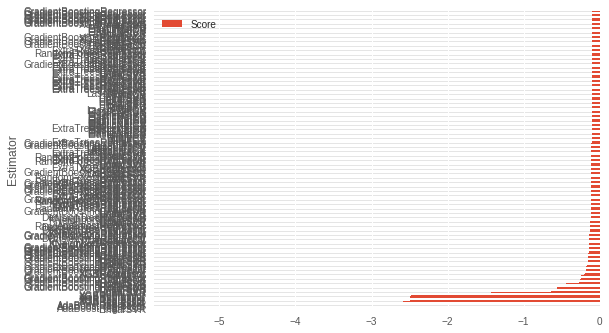

In [275]:
ax = hold.iloc[:].plot(kind="barh")
ax.invert_yaxis()
plt.show()

In [268]:
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('la_airbnb_pipeline.py')

Optimization Progress:  32%|███▏      | 95/300 [00:42<01:17,  2.64pipeline/s]

Generation 1 - Current best internal CV score: 0.10351433248270918


Optimization Progress:  47%|████▋     | 141/300 [01:13<01:02,  2.53pipeline/s]

Generation 2 - Current best internal CV score: 0.10351433248270918


Optimization Progress:  62%|██████▏   | 186/300 [01:32<00:31,  3.57pipeline/s]

Generation 3 - Current best internal CV score: 0.10342563100017013


Optimization Progress:  77%|███████▋  | 230/300 [02:01<00:35,  1.99pipeline/s]

Generation 4 - Current best internal CV score: 0.10317181242400349


Generation 5 - Current best internal CV score: 0.10317181242400349

Best pipeline: GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.9, GradientBoostingRegressor__learning_rate=DEFAULT, GradientBoostingRegressor__loss=huber, GradientBoostingRegressor__max_depth=DEFAULT, GradientBoostingRegressor__max_features=0.15, GradientBoostingRegressor__min_samples_leaf=DEFAULT, GradientBoostingRegressor__min_samples_split=12, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6)
0.105158195149


In [ ]:
import pandas as pd
import seaborn as sns

In [396]:
y_hat_e = np.expm1(y_hat)
y_test_e = np.expm1(y_test)

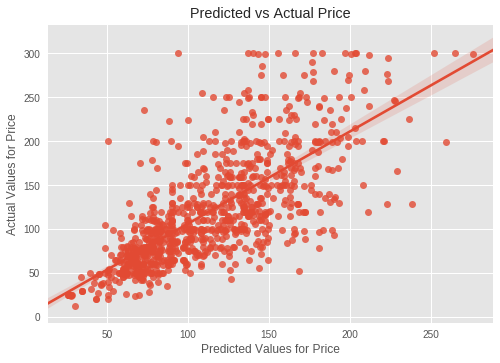

In [398]:
sns.regplot(y_hat_e, y_test_e)
plt.title('Predicted vs Actual Price')
plt.xlabel('Predicted Values for Price')
plt.ylabel('Actual Values for Price')
plt.show()